In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/code/bechir_paper/")
import nicon.plotting as plotting
import scipy as sc

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/env/lib/python3.8/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
hist = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/BrainStates/kmeans/kmeans7/hist.npy")
order = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/BrainStates/kmeans/kmeans7/order.npy")

In [3]:
hist_data = np.zeros((7,3))
hist_data[:,0] = hist[:,0]
hist_data[:,1] = (hist[:,2] + hist[:,4])/np.sum(hist[:,[2,4]])
hist_data[:,2] = (hist[:,1] + hist[:,3] + hist[:,5])/np.sum(hist[:,[1,3,5]])
names = ["awake","Moderate Sedation","Deep Sedation"]

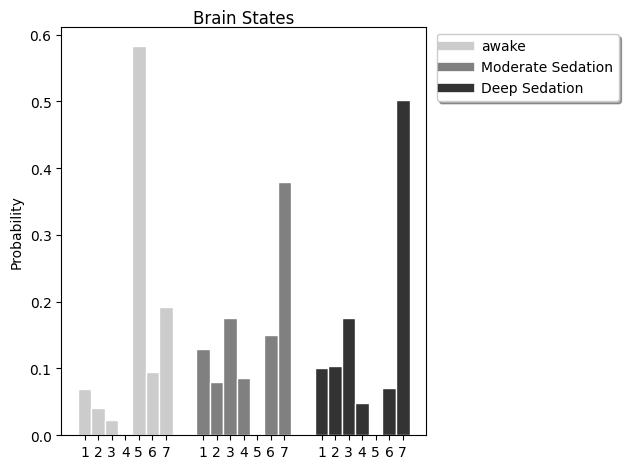

In [4]:
fig = plotting.plot_brain_states_hist(hist_data, names)
fig.savefig("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/BrainStates/kmeans/kmeans7/brain_states_hist2.png")

In [5]:
states = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/BrainStates/kmeans/kmeans7/full_states.npy")
structural = states[-1]

In [66]:
structural_flat.shape

(3321,)

In [6]:
n_samples, n_rois = states.shape[:-1]
iu = np.triu_indices(n_rois, k=1)
# iu = np.tril_indices(n_rois, k= -1)
conn_flat = [arr[iu] for arr in states[:-1]]
structural_flat = structural[iu]
corr = [np.correlate(sc.stats.zscore(np.abs(conn_flat[i]),axis = 0),structural_flat) for i in range(n_samples-1)]

In [7]:
corr

[array([746.38266607]),
 array([842.89284675]),
 array([-67.18938833]),
 array([641.31664587]),
 array([475.46714479]),
 array([635.53808079]),
 array([323.07973159])]

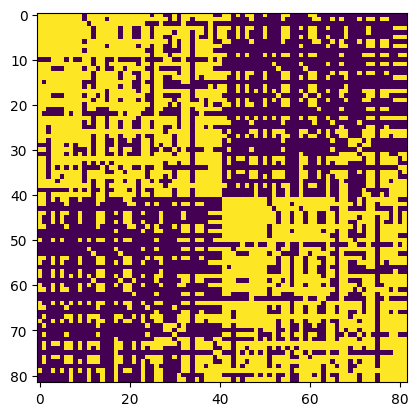

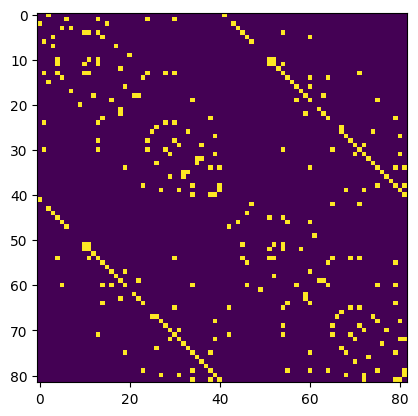

In [9]:
plt.imshow(structural > 0)
plt.show()
plt.imshow(states[1] > 0.2)
plt.show()

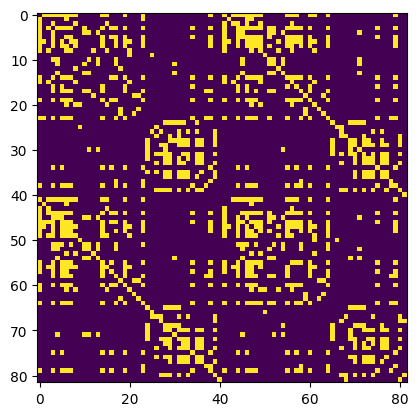

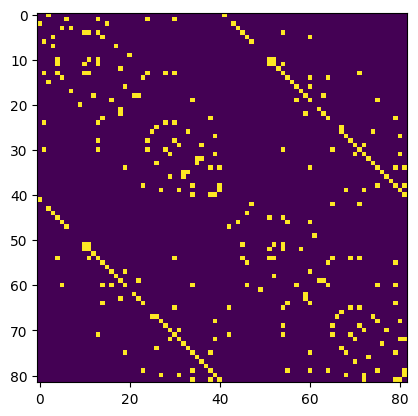

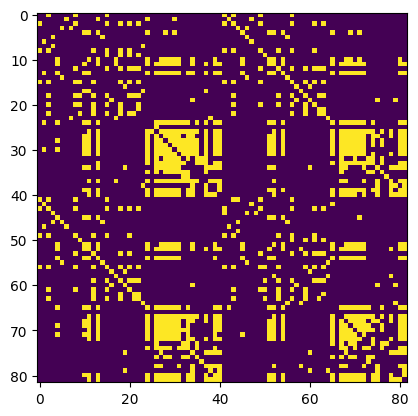

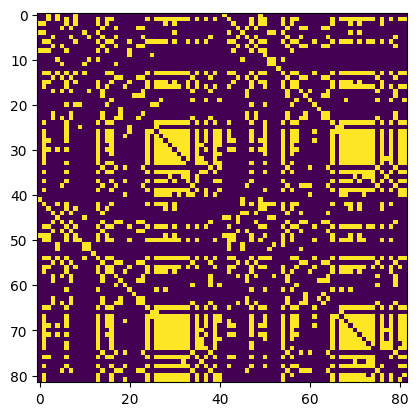

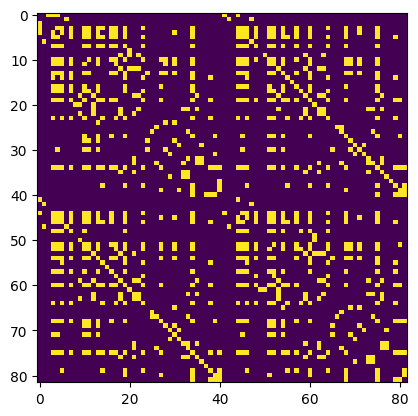

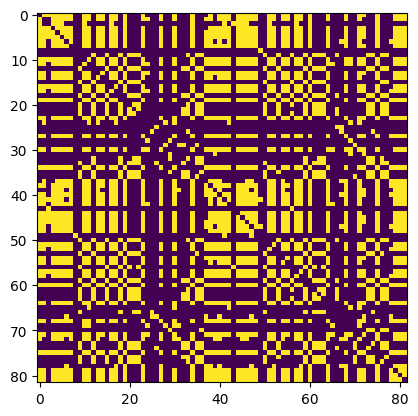

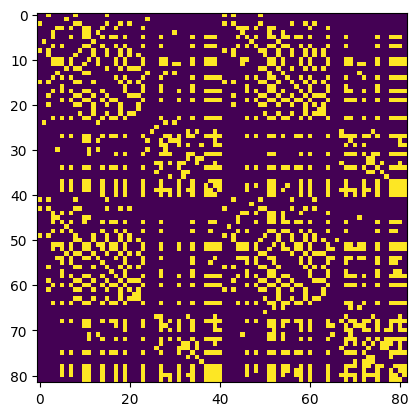

In [12]:
for i in range(n_samples - 1):
    plt.imshow(states[i] > 0.2)
    plt.show()

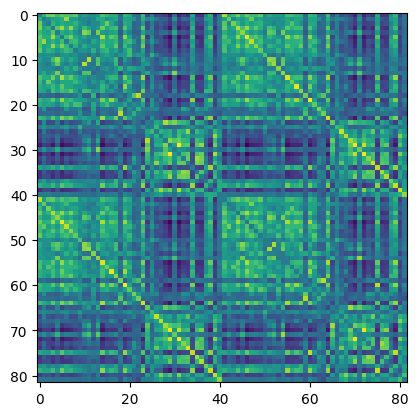

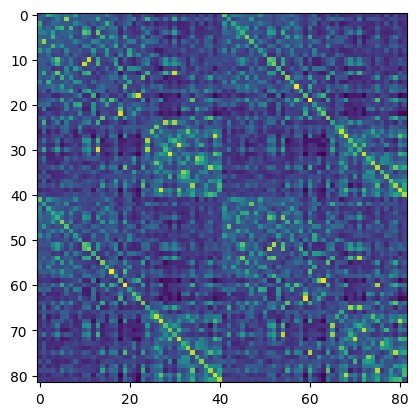

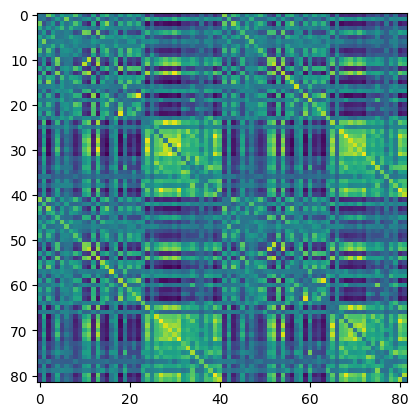

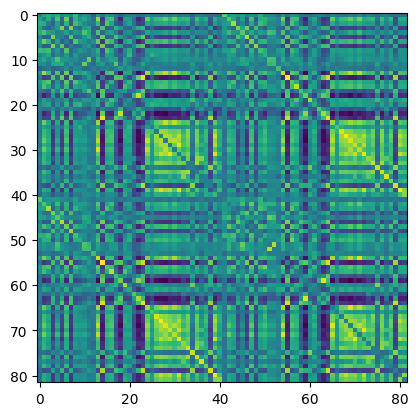

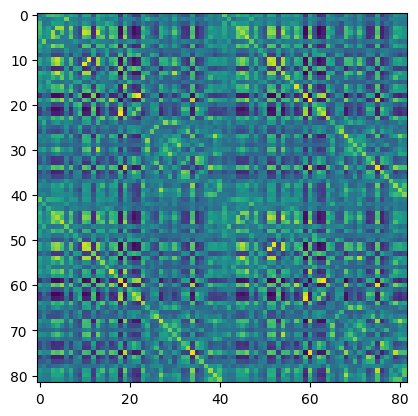

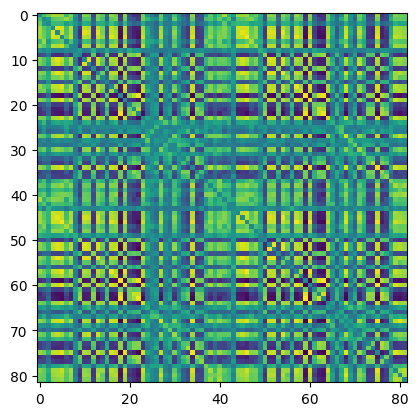

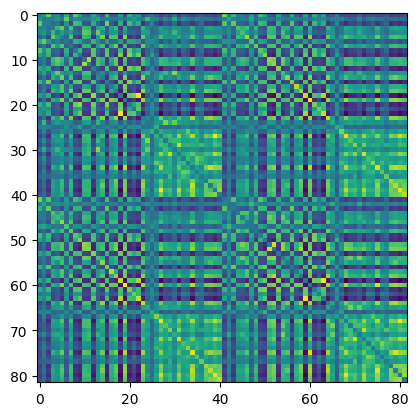

In [84]:
for i in range(n_samples - 1):
    plt.imshow((states[i] - np.mean(states[i]))/np.sum(states[i]**2))
    plt.show()

In [14]:
2.4*496*3//49

72.0

In [19]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')

In [20]:
dfc.shape

(72384, 1, 82, 82)

In [21]:
82*82

6724

In [22]:
72384/6724

10.765020820939917

In [25]:
test = dfc[:,0,:3,:3].reshape(-1,9)

In [29]:
test.shape

(72384, 9)

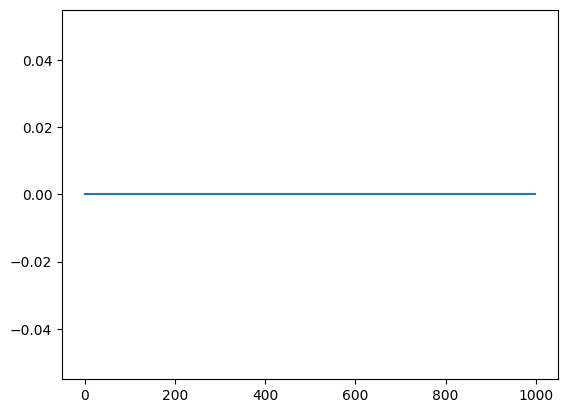

In [33]:
plt.plot(test[:1000,0])

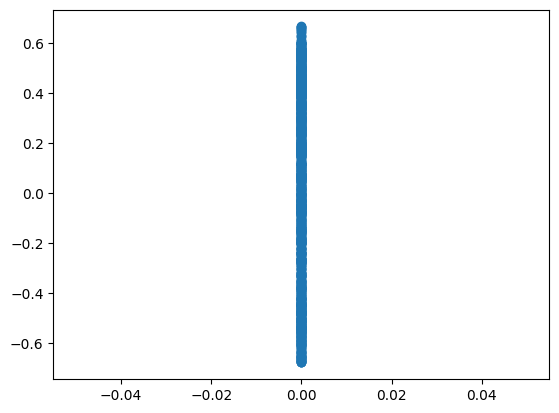

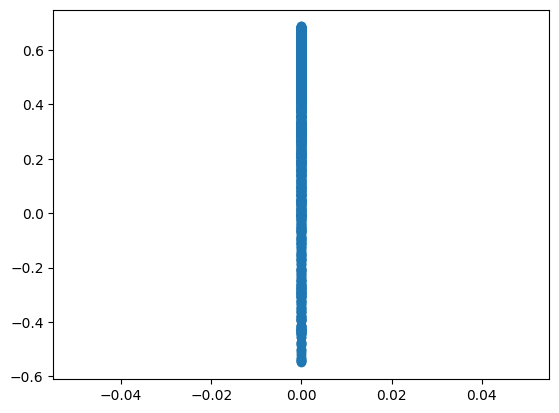

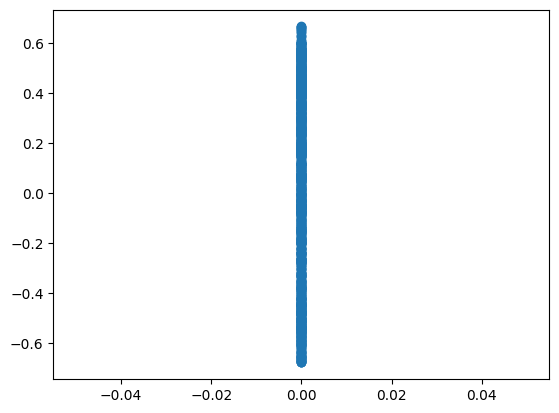

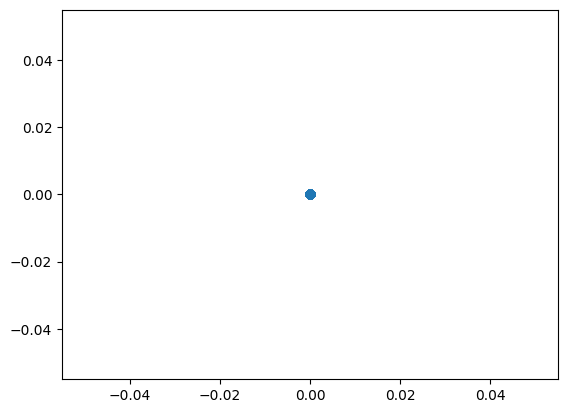

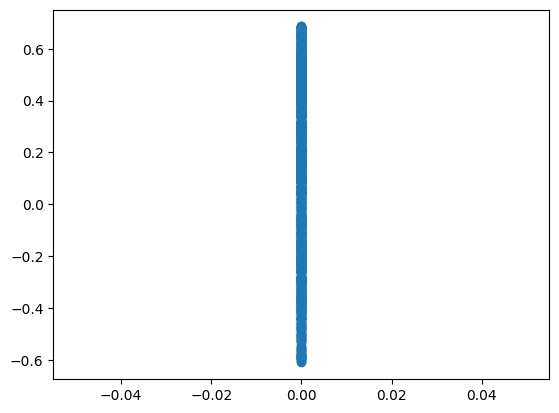

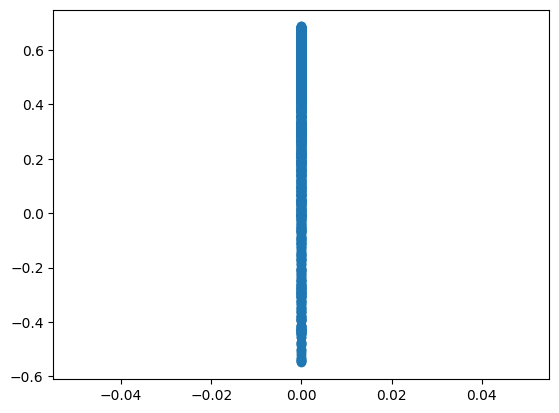

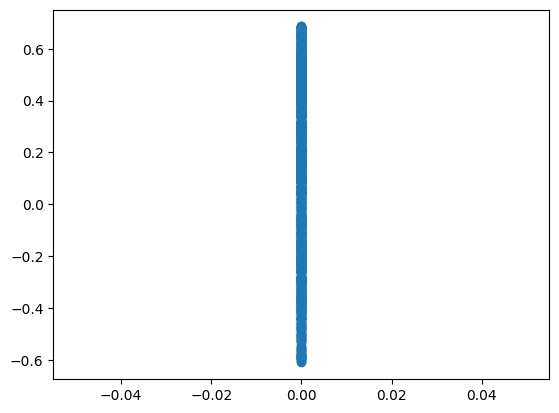

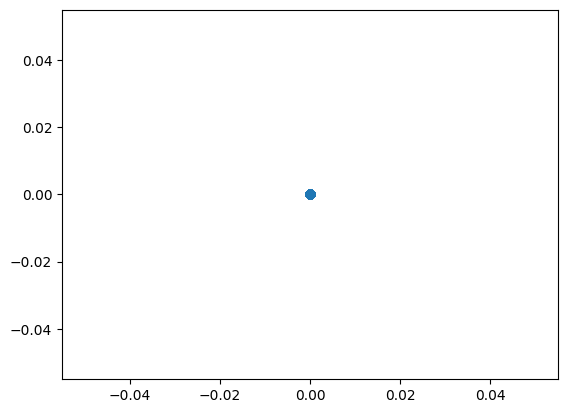

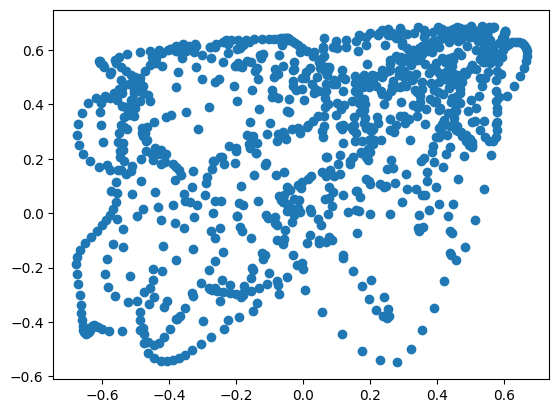

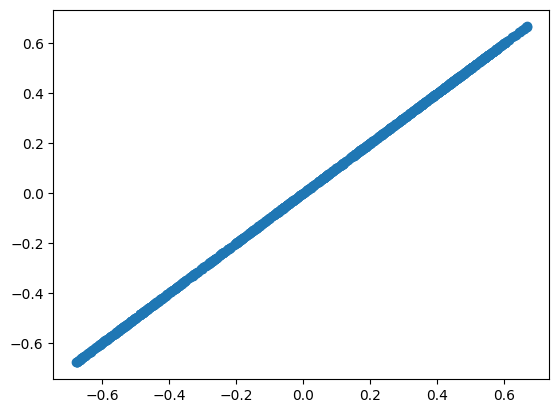

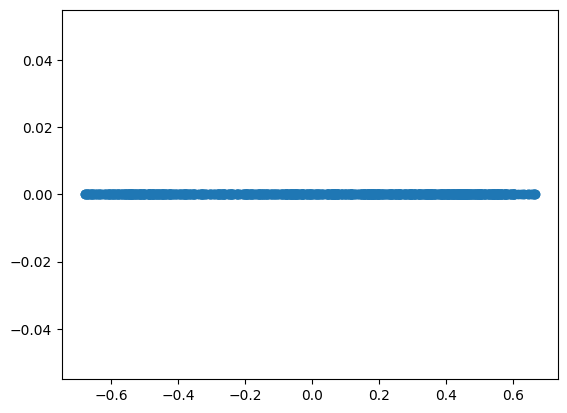

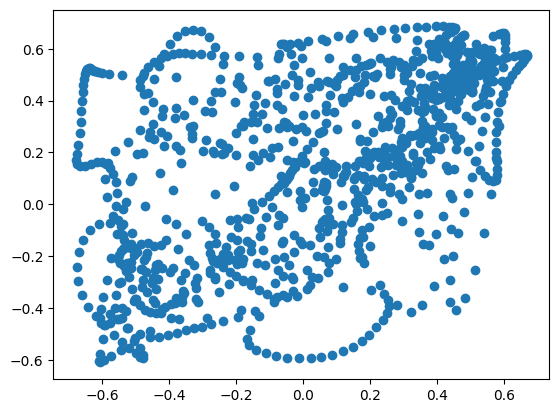

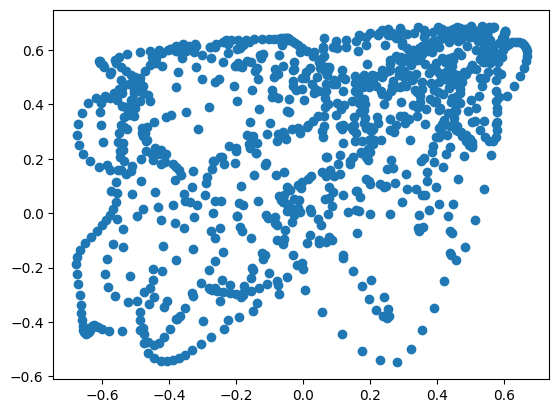

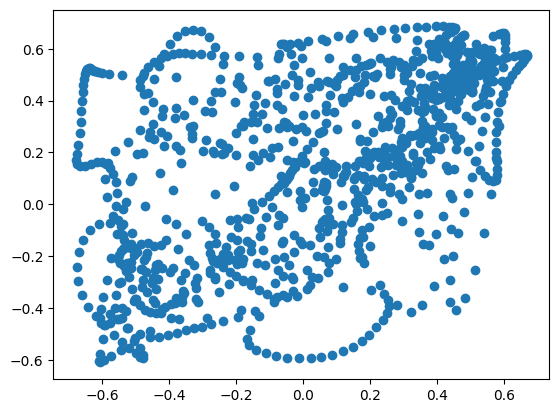

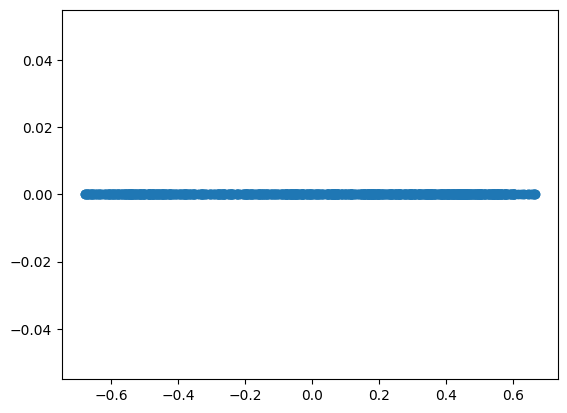

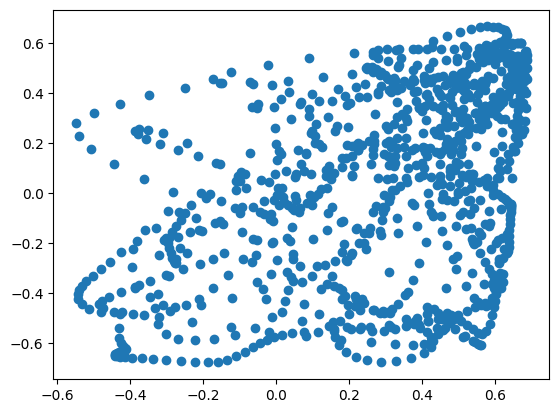

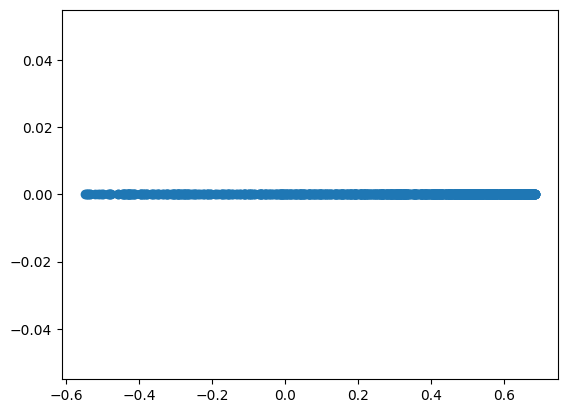

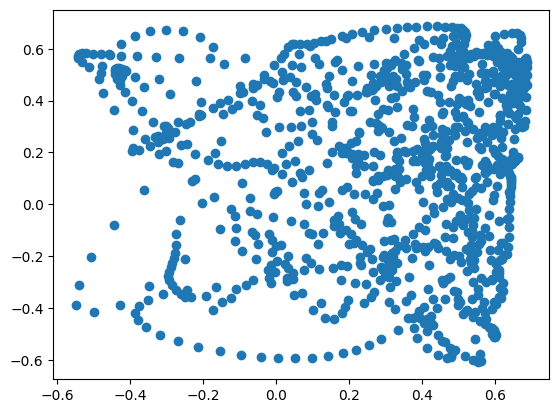

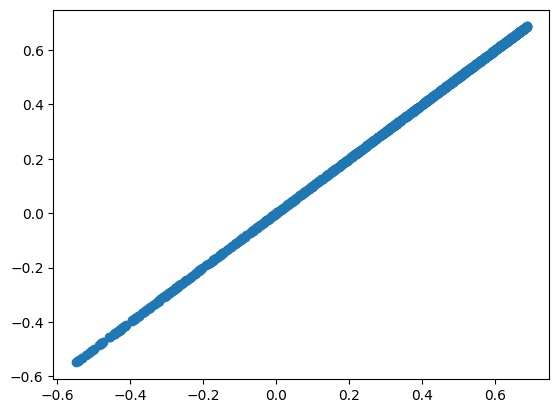

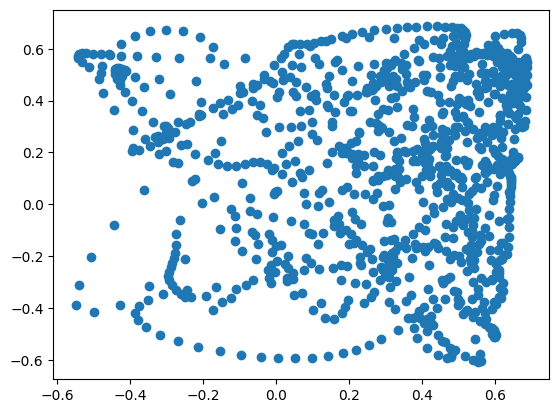

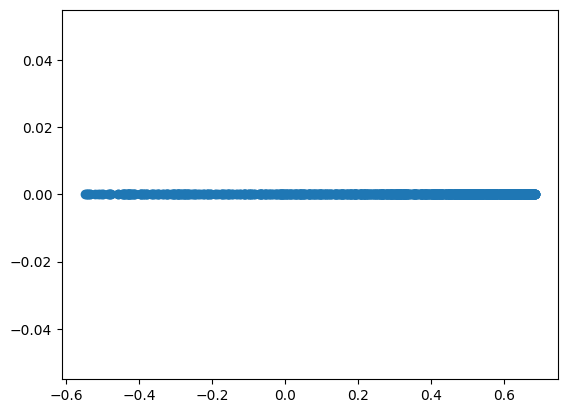

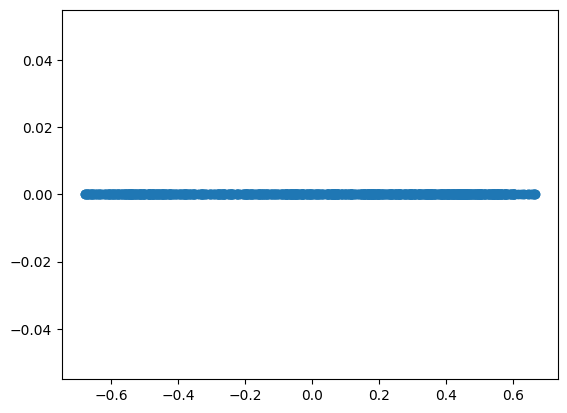

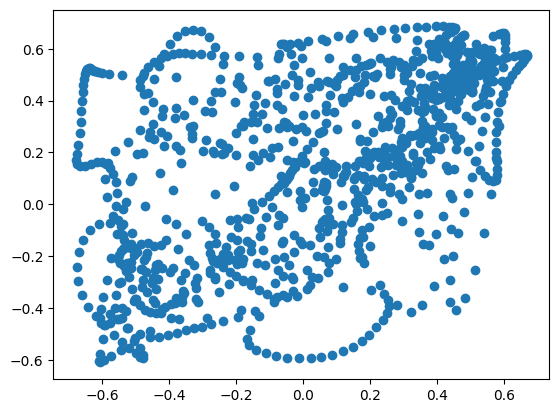

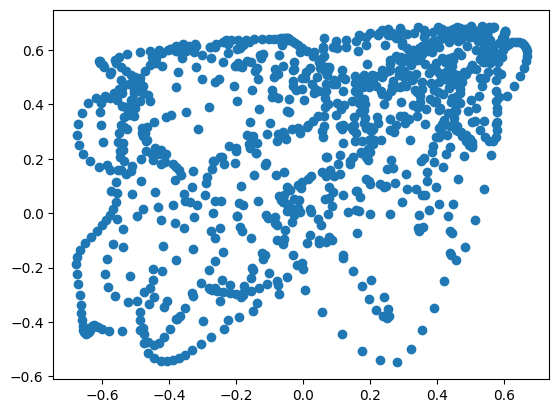

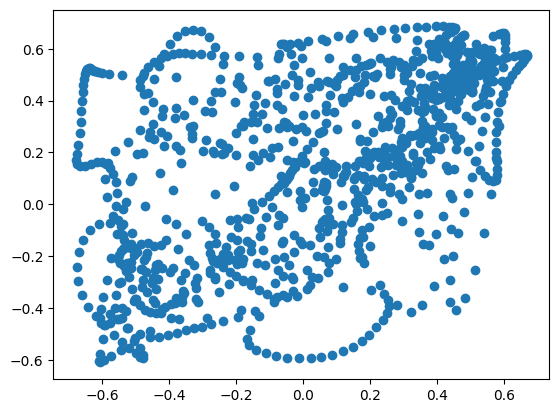

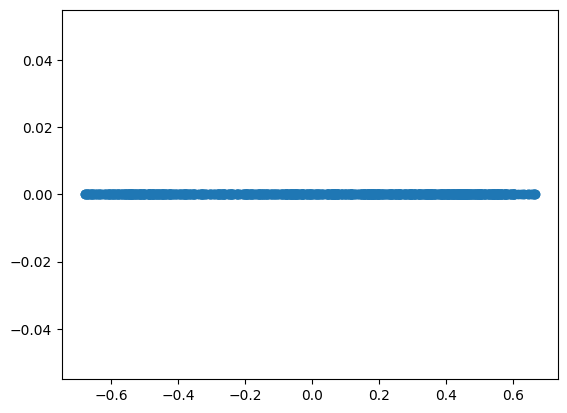

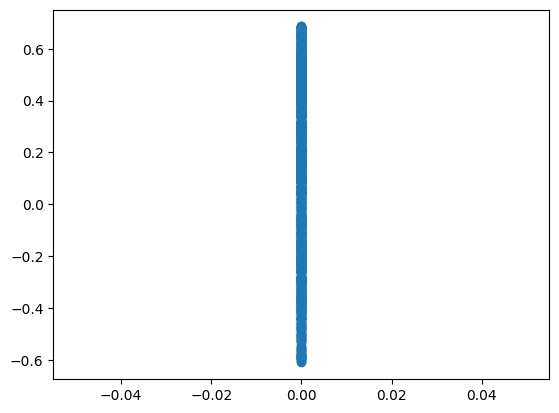

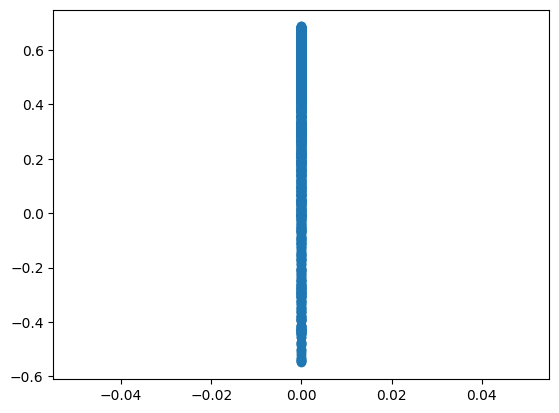

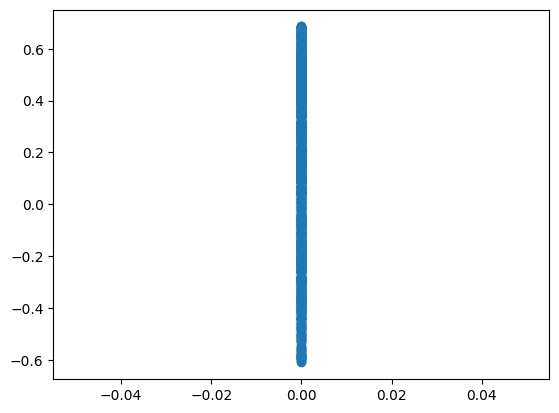

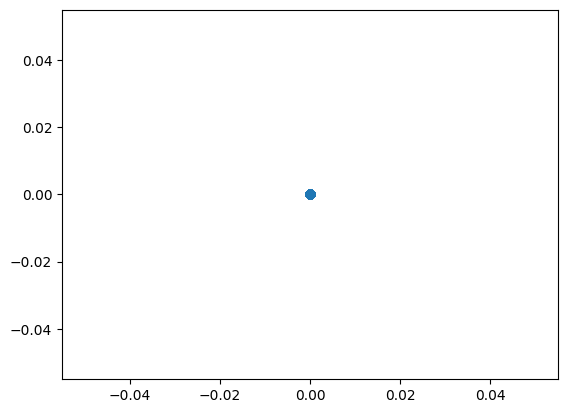

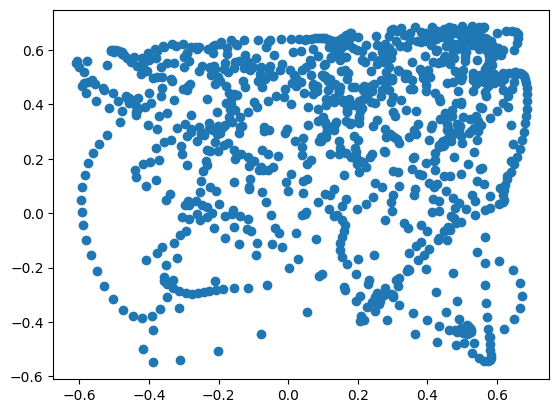

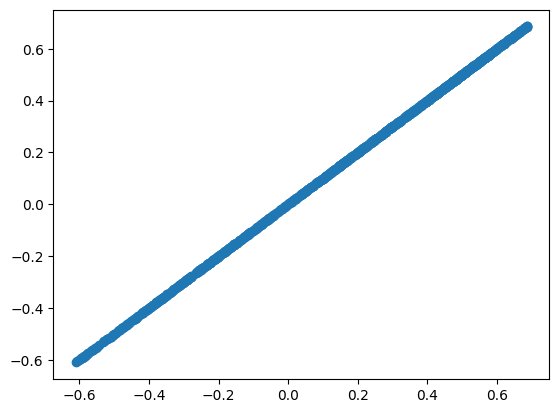

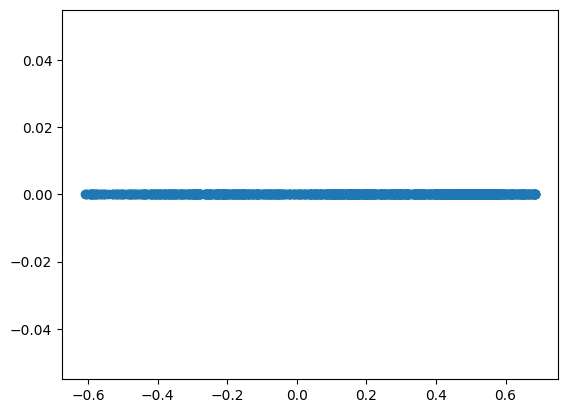

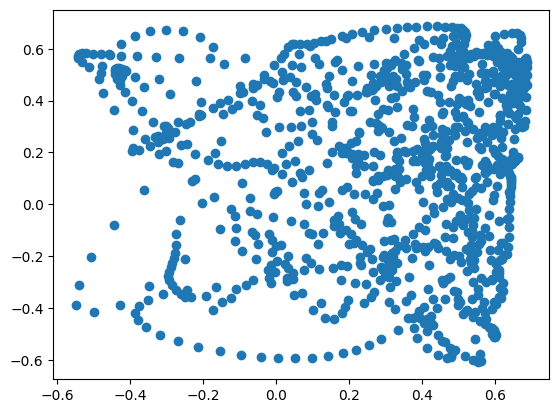

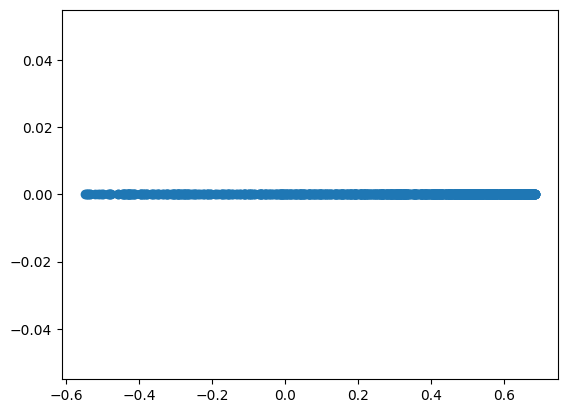

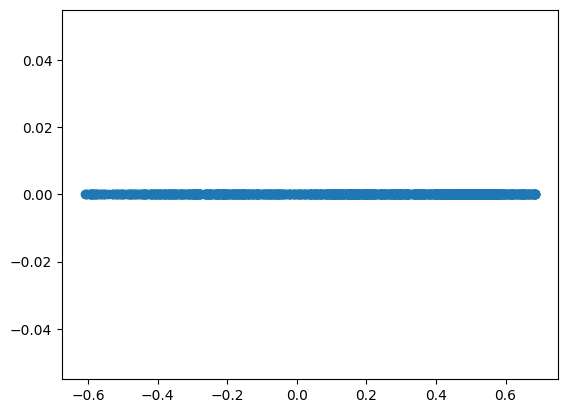

In [36]:
for i in range(9):
    for j in range(i,9):
        if i != j:
            plt.scatter(test[:1000,i],test[:1000,j])
            plt.show()